In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/My Drive/bank-additional-full.csv', sep=';', quotechar='"')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Выделяем целевую переменную

In [ ]:
data.loc[data['y'] == 'yes', 'y'] = 1
data.loc[data['y'] == 'no', 'y'] = 0

data['y'] == data['y'].astype(int)

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
data = data.drop(columns=['duration'])

# Разделение признаков на числовые и категориальные с помощью select_dtypes

In [ ]:
data_categorical = data.select_dtypes(include=['object'])
data_numeric = data.select_dtypes(exclude=['object'])

one-hot кодирование 

In [ ]:
data_one_hot = pd.get_dummies(data_categorical)

# Формируем общую матрицу объекты-признаки

In [ ]:
X = pd.concat([data_numeric, data_one_hot], axis='columns').drop(columns=['y_0', 'y_1'])

In [ ]:
y = data['y']

In [ ]:
X.shape

(41188, 62)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Нормировка признаков, обработка

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
 y_train=y_train.astype('int')
 y_test=y_test.astype('int')

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_proba = model.predict_proba(X_train_scaled)[:,1]

In [ ]:
y_test_proba = model.predict_proba(X_test_scaled)[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Train roc-auc: 0.7912670120687808
Test roc-auc: 0.8013813613967015


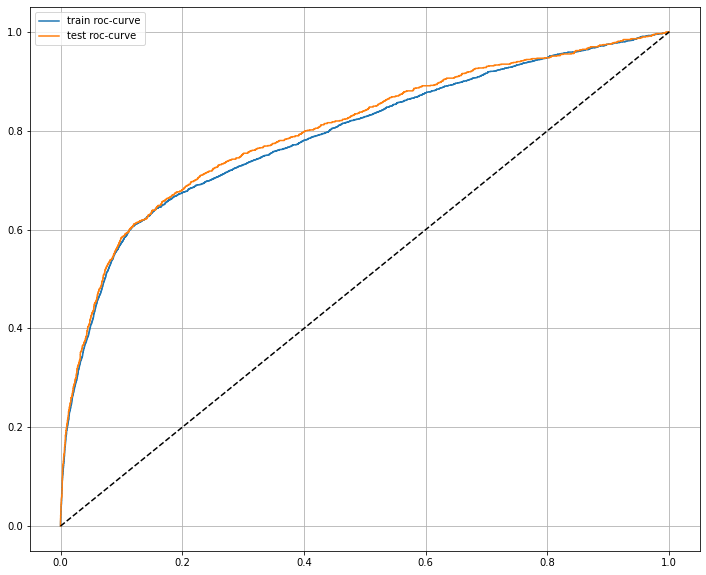

In [ ]:
plt.figure(figsize=(12,10))

print(f"Train roc-auc: {roc_auc_score(y_train, y_train_proba)}")
print(f"Test roc-auc: {roc_auc_score(y_test, y_test_proba)}")

plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show();

In [ ]:


from sklearn.metrics import precision_score

true = [0,1,1,0,0,1,1,0,0,0]

pred = [0,1,1,0,0,1,0,1,0,1]

print (precision_score(true,pred))


0.6


In [ ]:
from sklearn.metrics import recall_score

true = [0,1,1,0,0,1,1,0,0,0]

pred = [0,1,1,0,0,1,0,1,0,1]

print (recall_score(true,pred))

0.75


In [ ]:
from sklearn.metrics import roc_auc_score

x = [0,1,1,0,0,1,1,0,0,0]

x_ver = [0.35, 0.85, 0.75, 0.25, 0.05, 0.45, 0.95, 0.65, 0.15, 0.55]

print(f'roc-auc: {roc_auc_score(x, x_ver)}')


roc-auc: 0.9166666666666667


In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [10, 2, -1, 3, 7]
y_pred = [8, 1, 3, -1, 6]
mean_squared_error(y_true, y_pred)

7.6